## Hackathon Santé

In [3]:
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [50]:
pop = pd.read_excel(filepath2, sheet_name=4, index_col=0)
pop = pop.iloc[3:-4, :]
pop = pop.drop('France métropolitaine ')
departements = pop.iloc[1:, 0]
pop = pop.iloc[:, 1:]
cols = pop.iloc[0, :]
cols1 = ['Ensemble : ' + i for i in cols[:6]]
cols2 = ['Hommes : ' + i for i in cols[6:12]]
cols3 = ['Femmes : ' + i for i in cols[12:18]]
cols1.extend(cols2)
cols1.extend(cols3)
pop.columns = cols1
pop = pop.iloc[1:, :]
pop.index = [str(i) for i in pop.index]

In [6]:
filepath = "/Users/jean-baptiste/Downloads/Honoraires_totaux_des_professionnels_de_sante_par_departement_en_2016.xls"
depassements = pd.read_excel(filepath, sheet_name=2, na_values='nc')
depassements = depassements[depassements.loc[:, 'DEPARTEMENT'] != 'TOTAL FRANCE METROPOLITAINE']
depassements = depassements[depassements.loc[:, 'DEPARTEMENT'] != 'TOTAL OUTRE-MER']
depassements = depassements[depassements.loc[:, 'DEPARTEMENT'] != 'TOTAL France ENTIERE']
depassements.loc[:, 'DEPARTEMENT'] = depassements.loc[:, 'DEPARTEMENT'].str.replace('-[^\d]*', '')
depassements = depassements.drop('FRAIS DE DEPLACEMENT (Euros)', axis=1)
depassements = depassements.drop('HONORAIRES SANS DEPASSEMENT (Euros)', axis=1)
depassements['Densité'] = [val / pop['Ensemble : Total'].loc[depassements['DEPARTEMENT'][depassements.index[i]]] * 100000 for i, val in enumerate(depassements['EFFECTIFS'])]
depassements.columns = ['Spécialité', 'Département', 'Effectifs', 'Dépassements', 'Total honoraires', 'Densité']

In [7]:
medecins = depassements[depassements['Spécialité'] == 'TOTAL MEDECINS']

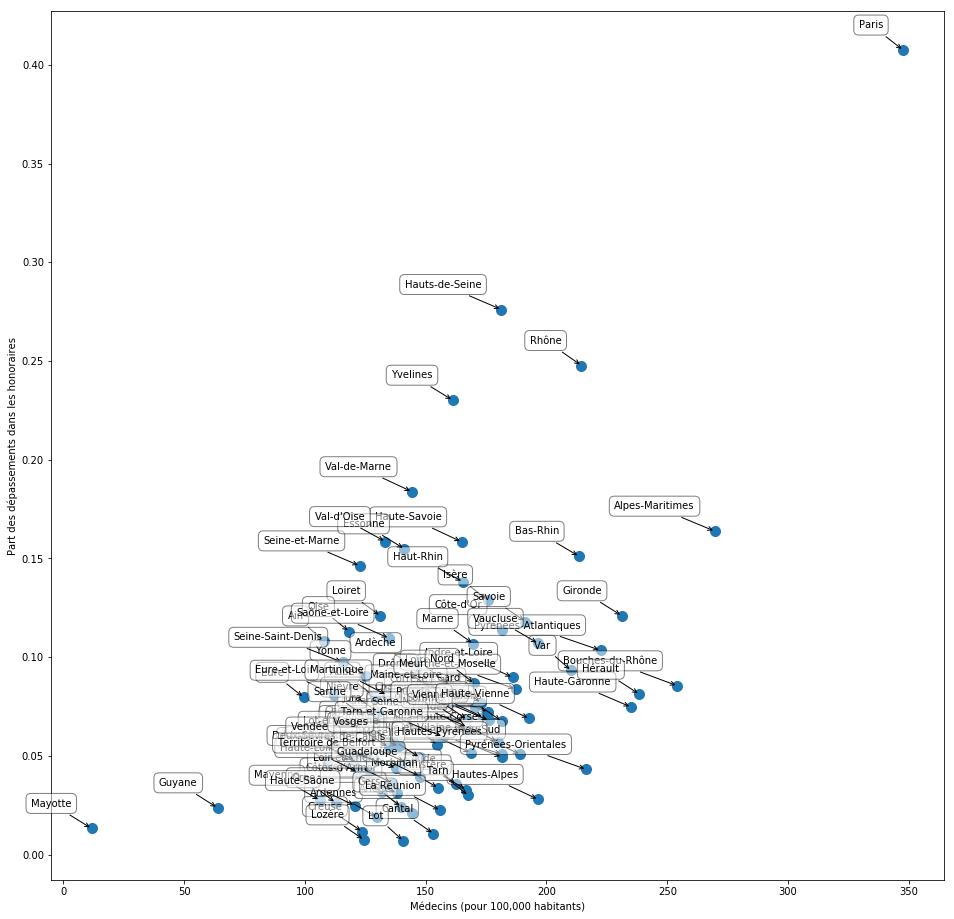

In [71]:
plt.figure(figsize=[16, 16])
plt.plot(medecins['Densité'], medecins['Dépassements']/medecins['Total honoraires'], 'o', markersize=10)
plt.xlabel('Médecins (pour 100,000 habitants)')
plt.ylabel('Part des dépassements dans les honoraires')

for dep, x, y in zip(departements, medecins['Densité'], medecins['Dépassements']/medecins['Total honoraires']):
    plt.annotate(dep, xy=(x, y), xytext=(-20, 20), textcoords='offset points', ha='right', va='bottom', bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=0.5), arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

plt.show()

In [10]:
infirmiers = pd.read_excel(filepath, sheet_name=6, na_values='nc')
infirmiers = infirmiers[infirmiers.loc[:, 'DEPARTEMENT'] != 'TOTAL FRANCE METROPOLITAINE']
infirmiers = infirmiers[infirmiers.loc[:, 'DEPARTEMENT'] != 'TOTAL OUTRE-MER']
infirmiers = infirmiers[infirmiers.loc[:, 'DEPARTEMENT'] != 'TOTAL France ENTIERE']
infirmiers.loc[:, 'DEPARTEMENT'] = infirmiers.loc[:, 'DEPARTEMENT'].str.replace('-[^\d]*', '')
infirmiers = infirmiers.drop('FRAIS DE DEPLACEMENT (Euros)', axis=1)
infirmiers = infirmiers.drop('HONORAIRES SANS DEPASSEMENT (Euros)', axis=1)
infirmiers = infirmiers.drop('DEPASSEMENTS (Euros)', axis=1)
infirmiers = infirmiers.drop('TOTAL DES HONORAIRES (Euros)', axis=1)
infirmiers.columns = ['Spécialité', 'Département', 'Effectifs']
infirmiers = infirmiers[:101]
infirmiers = infirmiers.set_index('Département')
infirmiers = pd.concat([infirmiers, pop['Ensemble : 75 ans et plus']], axis=1)
infirmiers = pd.concat([infirmiers, pop['Ensemble : 75 ans et plus'] + pop['Ensemble : 60 à 74 ans']], axis=1)
infirmiers.columns = [infirmiers.columns[0], infirmiers.columns[1], 'Très âgés', 'Âgés']

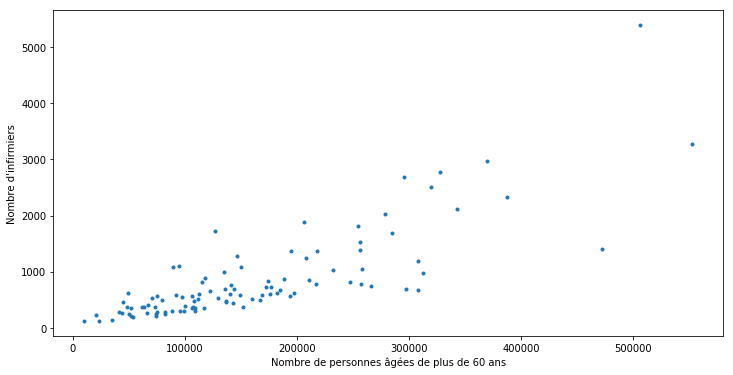

In [11]:
plt.figure(figsize=[12, 6])
plt.plot(infirmiers['Âgés'], infirmiers['Effectifs'], '.')
plt.xlabel('Nombre de personnes âgées de plus de 60 ans')
plt.ylabel("Nombre d'infirmiers")
plt.show()

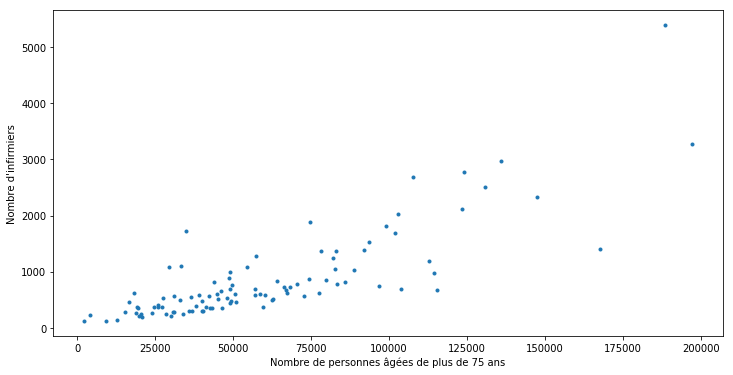

In [12]:
plt.figure(figsize=[12, 6])
plt.plot(infirmiers['Très âgés'], infirmiers['Effectifs'], '.')
plt.xlabel('Nombre de personnes âgées de plus de 75 ans')
plt.ylabel("Nombre d'infirmiers")
plt.show()

On cherche à corroborer l'information du Monde selon laquelle les spécialistes qui facturent le plus de dépassements à Paris sont les gynécologues médicaux et les gériatres.

In [13]:
paris = depassements[depassements['Département'] == '75']
paris['Part des dépassements'] = paris['Dépassements'] / paris['Total honoraires']
paris.set_index('Spécialité').sort_values('Part des dépassements', ascending=False).loc[:, ['Effectifs', 'Part des dépassements']]

/Users/jean-baptiste/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Effectifs,Part des dépassements
Spécialité,,
46- Chirurgie plastique reconstructrice et esthétique,186,0.712486
16- Chirurgie urologique,54,0.632853
45- Chirurgie maxillo-faciale et stomatologie,17,0.631904
09- Médecine interne,61,0.631246
"TOTAL STOMATOLOGIE (45, 18)",113,0.623330
18- Stomatologie,96,0.621480
07- Gynécologie obstétrique,314,0.620844
"TOTAL GYNECOLOGIE (70, 77, 79, 07)",519,0.608902
31- Médecine Physique et de Réadaptation,37,0.604362


In [14]:
print('Fake News')

Fake News
